In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.applications.mobilenet import MobileNet, preprocess_input

https://www.kaggle.com/amolikvivian/cifar10-transfer-learning-mobilenet

In [ ]:
#Loading dataset

(trainX, trainY), (testX, testY) = cifar10.load_data()

In [ ]:
#Analyzing shape of data
print('Train ', '\nData :', trainX.shape, '\nLabel :', trainY.shape)

print('\nTest ', '\nData :', testX.shape, '\nLabel :', testY.shape)

Train  
Data : (50000, 32, 32, 3) 
Label : (50000, 1)

Test  
Data : (10000, 32, 32, 3) 
Label : (10000, 1)


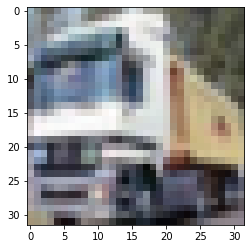

In [ ]:
#Visualizing image from training dataset

img = plt.imshow(trainX[1])

In [ ]:
# Se preprocesan los datos con el mismo método de preprocesamiento que usa la red
trainX_preprocesado = preprocess_input(trainX)
testX_preprocesado = preprocess_input(testX)

In [ ]:
#One Hot Encoding Labels from Train and Test Dataset
from keras.utils import to_categorical

trainY_one_hot = to_categorical(trainY)
testY_one_hot = to_categorical(testY)

# Congelando las capas ya entrenadas

In [ ]:
#Initializing MobileNet as Base Model for Transfer Learning

from keras.applications import MobileNet
#include_top = False 
base_model = MobileNet(include_top=False, weights='imagenet',
            input_shape=(32,32,3), classes=trainY.shape[1])

In [ ]:
#Adding layers to base model of MobileNet

model = Sequential()

#Creating base layer of VGG19
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())

#Adding the Dense Layers and Dropout
model.add(Dense(512,activation=('relu'))) 

model.add(Dense(256,activation=('relu'))) 

model.add(Dropout(.3))

model.add(Dense(128,activation=('relu')))

model.add(Dropout(.2))

model.add(Dense(10,activation=('softmax')))

In [ ]:
#Visualizing Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1, 1, 1024)        3228864   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 1, 1024)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

In [ ]:
#Compiling Model using SGD 

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Training Model
hist = model.fit(trainX_preprocesado, trainY_one_hot, batch_size = 100, epochs = 20, 
                 validation_split = 0.1)

Epoch 1/20
450/450 [==============================] - 7s 15ms/step - loss: 1.3335 - accuracy: 0.5486 - val_loss: 0.8096 - val_accuracy: 0.7302
Epoch 2/20
450/450 [==============================] - 6s 14ms/step - loss: 0.8384 - accuracy: 0.7345 - val_loss: 0.7309 - val_accuracy: 0.7656
Epoch 3/20
450/450 [==============================] - 6s 14ms/step - loss: 0.6956 - accuracy: 0.7805 - val_loss: 0.7077 - val_accuracy: 0.7682
Epoch 4/20
450/450 [==============================] - 6s 14ms/step - loss: 0.6099 - accuracy: 0.8093 - val_loss: 0.6512 - val_accuracy: 0.7772
Epoch 5/20
450/450 [==============================] - 6s 14ms/step - loss: 0.5454 - accuracy: 0.8308 - val_loss: 0.6230 - val_accuracy: 0.7962
Epoch 6/20
450/450 [==============================] - 6s 14ms/step - loss: 0.5059 - accuracy: 0.8443 - val_loss: 0.6542 - val_accuracy: 0.7904
Epoch 7/20
450/450 [==============================] - 6s 14ms/step - loss: 0.4583 - accuracy: 0.8584 - val_loss: 0.7686 - val_accuracy: 0.7628

In [ ]:
#Training Model
hist = model.fit(trainX, trainY_one_hot, batch_size = 100, epochs = 20, 
                 validation_split = 0.1)

Epoch 1/20
450/450 [==============================] - 6s 14ms/step - loss: 1.3483 - accuracy: 0.5401 - val_loss: 0.8393 - val_accuracy: 0.7180
Epoch 2/20
450/450 [==============================] - 6s 13ms/step - loss: 0.8466 - accuracy: 0.7326 - val_loss: 0.9023 - val_accuracy: 0.7252
Epoch 3/20
450/450 [==============================] - 6s 13ms/step - loss: 0.6981 - accuracy: 0.7810 - val_loss: 0.8999 - val_accuracy: 0.7354
Epoch 4/20
450/450 [==============================] - 6s 13ms/step - loss: 0.6122 - accuracy: 0.8115 - val_loss: 0.7456 - val_accuracy: 0.7574
Epoch 5/20
450/450 [==============================] - 6s 13ms/step - loss: 0.5502 - accuracy: 0.8269 - val_loss: 0.6484 - val_accuracy: 0.7940
Epoch 6/20
450/450 [==============================] - 6s 14ms/step - loss: 0.4972 - accuracy: 0.8471 - val_loss: 0.7948 - val_accuracy: 0.7628
Epoch 7/20
450/450 [==============================] - 6s 14ms/step - loss: 0.4532 - accuracy: 0.8614 - val_loss: 0.6326 - val_accuracy: 0.8008

In [ ]:
#Testing accuracy of trained model

model.evaluate(testX, testY_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.9004 - accuracy: 0.7829


0.7828999757766724

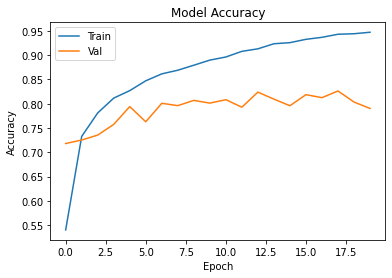

In [ ]:
#Visualizing Model Accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')

# Descongelando capas

https://keras.io/guides/transfer_learning/

In [ ]:
# Unfreeze the base model
base_model.trainable = True

In [ ]:
# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
# Train end-to-end. Be careful to stop before you overfit!
#Training Model
hist = model.fit(trainX, trainY_one_hot, batch_size = 100, epochs = 20, 
                 validation_split = 0.1)

Epoch 1/20
450/450 [==============================] - 7s 15ms/step - loss: 1.3772 - accuracy: 0.5281 - val_loss: 0.8748 - val_accuracy: 0.7184
Epoch 2/20
450/450 [==============================] - 6s 14ms/step - loss: 0.8466 - accuracy: 0.7351 - val_loss: 0.7234 - val_accuracy: 0.7518
Epoch 3/20
450/450 [==============================] - 6s 14ms/step - loss: 0.6884 - accuracy: 0.7820 - val_loss: 0.7335 - val_accuracy: 0.7656
Epoch 4/20
450/450 [==============================] - 6s 14ms/step - loss: 0.6032 - accuracy: 0.8112 - val_loss: 0.7115 - val_accuracy: 0.7748
Epoch 5/20
450/450 [==============================] - 6s 14ms/step - loss: 0.5451 - accuracy: 0.8262 - val_loss: 0.6515 - val_accuracy: 0.7956
Epoch 6/20
450/450 [==============================] - 6s 14ms/step - loss: 0.4942 - accuracy: 0.8459 - val_loss: 0.6747 - val_accuracy: 0.7848
Epoch 7/20
450/450 [==============================] - 6s 14ms/step - loss: 0.4640 - accuracy: 0.8588 - val_loss: 0.7410 - val_accuracy: 0.7812

In [ ]:
#Testing accuracy of trained model

model.evaluate(testX, testY_one_hot)[1]

313/313 [==============================] - 1s 5ms/step - loss: 0.7640 - accuracy: 0.8136


0.8136000037193298

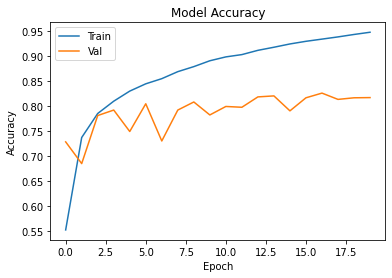

In [ ]:
#Visualizing Model Accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')